In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skln
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor, IsolationForest, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge
from sklearn.metrics import (explained_variance_score, mean_absolute_error,
                             mean_squared_error, mean_squared_log_error, r2_score)
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (OrdinalEncoder, PolynomialFeatures,
                                   StandardScaler)
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from xgboost import XGBRegressor


Description - Over here we imported the libraries and by importing the libraries we are setting up a path for data analysis, evaluation and model training.

In [31]:
nba_salary = pd.read_csv("./nba_salaries_2022_2023/nba_salaries.csv")
nba_salary.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.70,10.00,...,0.70,5.40,6.10,6.30,0.90,0.40,3.20,2.10,29.40,curryst01
1,1,John Wall,47345760,PG,32,LAC,34,3,22.20,4.10,...,0.40,2.30,2.70,5.20,0.80,0.40,2.40,1.70,11.40,walljo01
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.10,5.90,...,1.20,4.60,5.80,7.50,1.00,0.50,3.50,2.20,15.90,westbru01
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.50,11.10,...,1.20,7.10,8.30,6.80,0.90,0.60,3.20,1.60,28.90,jamesle01
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.60,10.30,...,0.40,6.30,6.70,5.00,0.70,1.40,3.30,2.10,29.10,duranke01


Description - Over here we imported the Kaggle dataset on NBA Salaries and this code gives an idea and sight of the content and structure of the dataset.

In [32]:
column_to_drop = ['Unnamed: 0','Player Name','Player-additional']  # Change this to the name of the column you want to remove
# Drop the specified column
nba_salary = nba_salary.drop(column_to_drop, axis=1)
nba_salary

,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,48070014,PG,34,GSW,56,56,34.70,10.00,20.20,0.49,...,0.92,0.70,5.40,6.10,6.30,0.90,0.40,3.20,2.10,29.40
1,47345760,PG,32,LAC,34,3,22.20,4.10,9.90,0.41,...,0.68,0.40,2.30,2.70,5.20,0.80,0.40,2.40,1.70,11.40
2,47080179,PG,34,LAL/LAC,73,24,29.10,5.90,13.60,0.44,...,0.66,1.20,4.60,5.80,7.50,1.00,0.50,3.50,2.20,15.90
3,44474988,PF,38,LAL,55,54,35.50,11.10,22.20,0.50,...,0.77,1.20,7.10,8.30,6.80,0.90,0.60,3.20,1.60,28.90
4,44119845,PF,34,BRK/PHO,47,47,35.60,10.30,18.30,0.56,...,0.92,0.40,6.30,6.70,5.00,0.70,1.40,3.30,2.10,29.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,35096,SF,23,POR,4,0,22.30,1.80,5.80,0.30,...,0.00,0.80,3.00,3.80,1.00,0.50,1.30,1.00,2.30,4.30
463,32795,SG,25,CHO,5,0,5.60,0.20,1.20,0.17,...,1.00,0.20,0.60,0.80,1.00,0.00,0.40,0.20,0.00,1.00
464,32171,SG,29,IND,3,0,18.70,2.70,7.00,0.38,...,1.00,0.00,2.00,2.00,1.70,0.70,0.00,0.00,1.70,8.00
465,5849,PF,23,BRK,1,0,35.00,6.00,12.00,0.50,...,1.00,3.00,6.00,9.00,7.00,0.00,1.00,4.00,5.00,16.00


Description - Before we proceeded with our Exploratory Data Analysis initially we did a basic data exploration. Additionally we did some data cleaning, examined some of the datsets and provided some basic summary stats.

In [33]:
print(nba_salary.dtypes)

Salary        int64
Position     object
Age           int64
Team         object
GP            int64
GS            int64
MP          float64
FG          float64
FGA         float64
FG%         float64
3P          float64
3PA         float64
3P%         float64
2P          float64
2PA         float64
2P%         float64
eFG%        float64
FT          float64
FTA         float64
FT%         float64
ORB         float64
DRB         float64
TRB         float64
AST         float64
STL         float64
BLK         float64
TOV         float64
PF          float64
PTS         float64
dtype: object


In [34]:
sal = pd.DataFrame(nba_salary['Salary'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sal.describe()

,Salary
count,467.00
mean,8416598.75
std,10708118.05
min,5849.00
25%,1782621.00
50%,3722040.00
75%,10633543.50
max,48070014.00


In [35]:
age = pd.DataFrame(nba_salary['Age'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
age.describe()

,Age
count,467.00
mean,25.82
std,4.28
min,19.00
25%,23.00
50%,25.00
75%,29.00
max,42.00


Exploratory Data Analysis

Description - Over here we performed EDA and plotted the salary distribution of NBA players using a histogram which gave us a glimpse into the salary distribution of NBA players. The histogram ploted the salary frequency against the various salary ranges.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


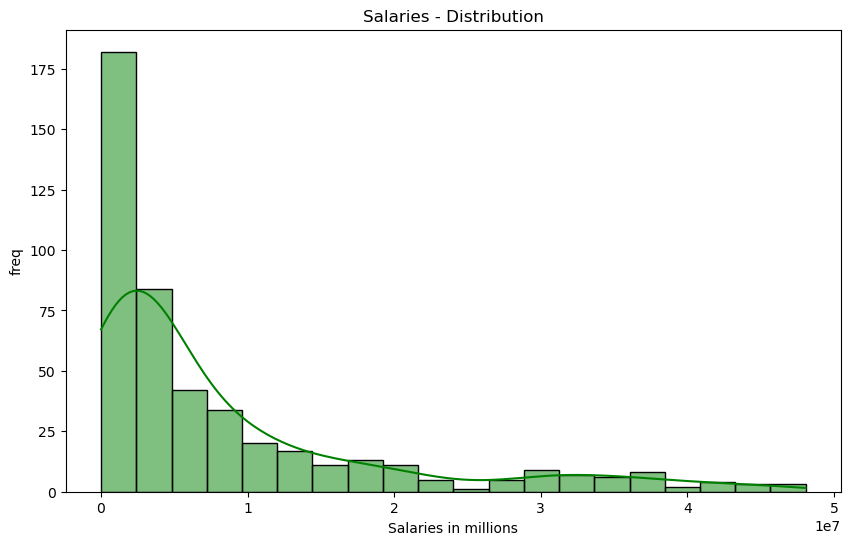

In [36]:
#EDA (Exploratory Data Analysis)
#Plotting the Distribution of the Salaries
plt.figure(figsize=(10, 6))
sb.histplot(nba_salary['Salary'], bins=20, kde=True, color='green')
plt.title('Salaries - Distribution')
plt.xlabel('Salaries in millions')
plt.ylabel('freq')
plt.show()

Performing the Shapiro-Wilk and Levene's test on Salary ( using 2-pointer(2P) as the base variable)

In [74]:
import pandas as pd
from scipy.stats import shapiro, levene

# Load the dataset
nba_salary = pd.read_csv("./nba_salaries_2022_2023/nba_salaries.csv")
column = 'Salary'
# Perform normality and homogeneity of variances checks for each categorical variable
_, shapiro_pvalue = shapiro(nba_salary[column])
print(f"Shapiro-Wilk test p-value for {column}: {shapiro_pvalue}")

# Homogeneity of variances check using Levene's test
salary_by_category = [group for name, group in nba_salary.groupby('2P')['Salary']]
_, levene_pvalue = levene(*salary_by_category)  # Unpack list
print(f"Levene's test p-value for {column}: {levene_pvalue}")

Shapiro-Wilk test p-value for Salary: 9.733889524618172e-27
Levene's test p-value for Salary: 3.2311755769446467e-06


Representation of salaries by bar graph

Description - Over here we categorize NBA player salaries into different categories and ranges. We visualize the frequency of each salary range using a bar graph. This helps us understand the distribution of NBA salaries even further. 

     Salary   Salary Range
0  48070014  45-50 million
1  47345760  45-50 million
2  47080179  45-50 million
3  44474988  40-45 million
4  44119845  40-45 million


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


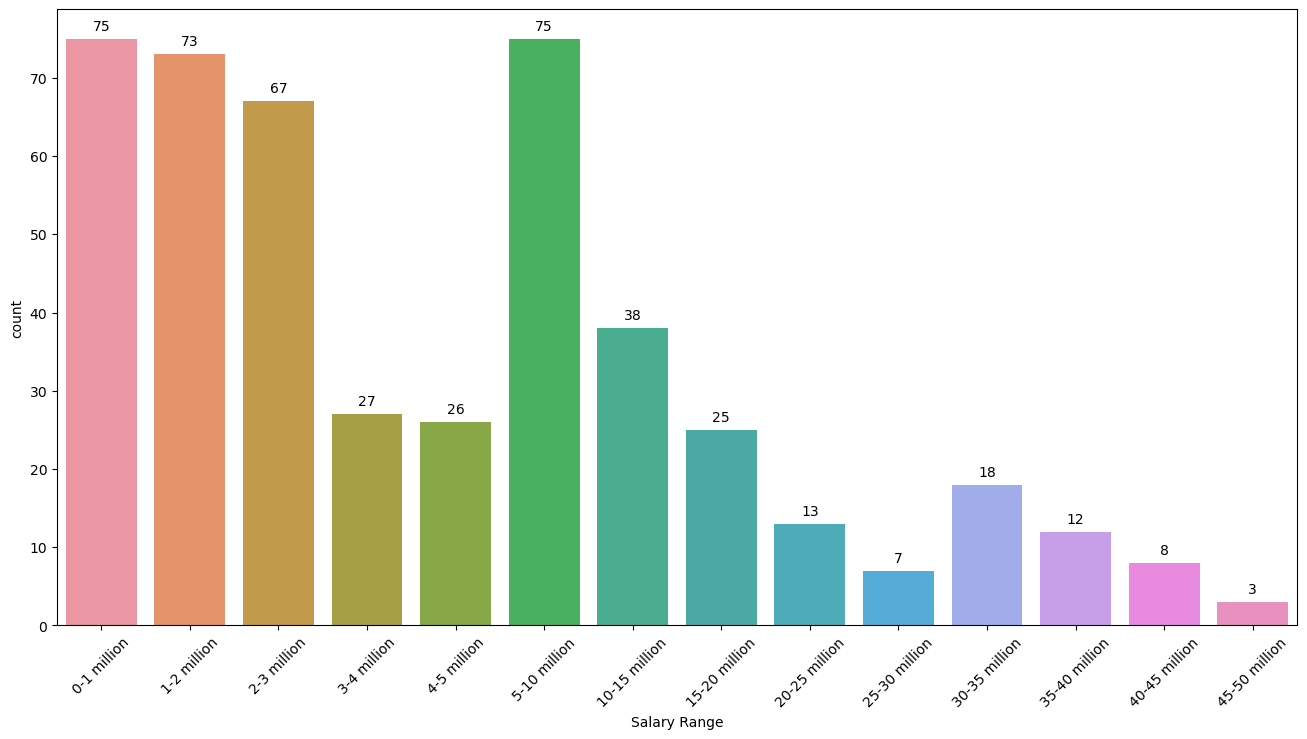

In [37]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Assuming 'Salary Range' is the column with categorized salary ranges as described in the previous example

# Define bins and their labels
bins = [0, 1e6,2e6,3e6,4e6,5e6, 10e6, 15e6, 20e6, 25e6, 30e6, 35e6,40e6,45e6,50e6]  # Continue as needed
labels = ['0-1 million','1-2 million','2-3 million','3-4 million','4-5 million', '5-10 million', '10-15 million', '15-20 million', '20-25 million', '25-30 million', '30-35 million', '35-40 million', '40-45 million','45-50 million']  # Match bin ranges

# Categorize salaries into ranges
sal['Salary Range'] = pd.cut(sal['Salary'], bins=bins, labels=labels, right=False)

# Verify the categorization
print(sal.head())

# Plot the data
f = plt.figure(figsize=(16, 8))
ax = sb.countplot(data=sal, x='Salary Range')

# Add frequency labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Improve x-axis labels readability
plt.xticks(rotation=45)
plt.show()


Accounting for missing values

Description - Over here we account for the missing values in the dataset and we visualize the effect of missing values on the median of NBA Player salaries for each feature which helps us in understanding potential implications in the modelling and processing of data. 

In [38]:
features_with_na=[features for features in nba_salary.columns if nba_salary[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(nba_salary[feature].isnull().mean(), 4),  ' % missing values')

3P% 0.0278  % missing values
2P% 0.0086  % missing values
FT% 0.0493  % missing values


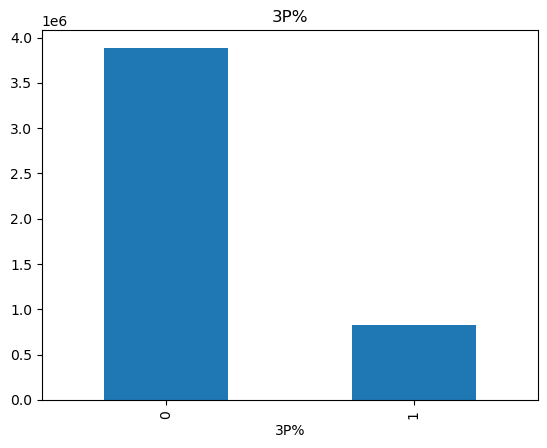

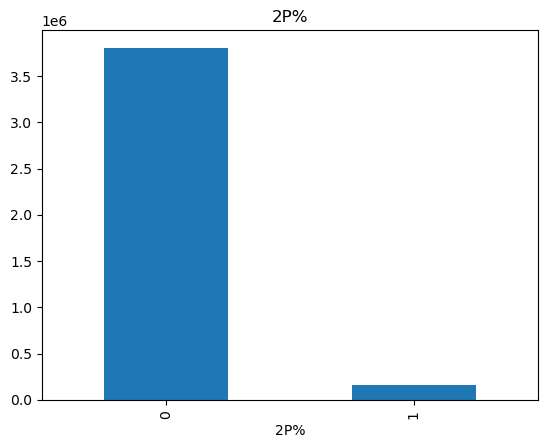

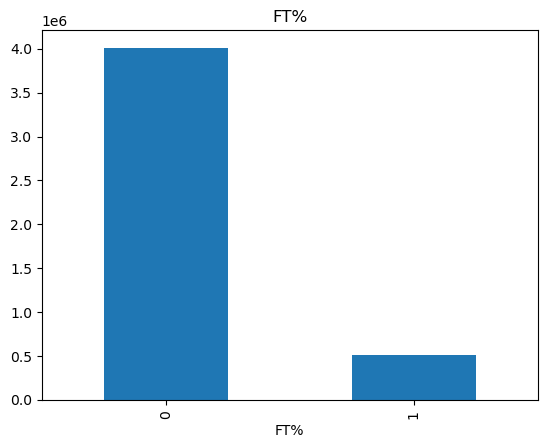

In [39]:
for feature in features_with_na:
    data = nba_salary.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['Salary'].median().plot.bar()
    plt.title(feature)
    plt.show()

Representation of numerical and categorical variables separately

Description - Over here we gain valuable insight into the dataset and its structure by presenting the numerical and categorical variables seperately. This helps us understand the different variable types present in the dataset, which is useful modelling and analysis of data.

In [40]:
# list of numerical variables
numerical_features = [feature for feature in nba_salary.columns if nba_salary[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
nba_salary[numerical_features].head()

Number of numerical variables:  27


,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,48070014,34,56,56,34.70,10.00,20.20,0.49,4.90,11.40,...,0.92,0.70,5.40,6.10,6.30,0.90,0.40,3.20,2.10,29.40
1,47345760,32,34,3,22.20,4.10,9.90,0.41,1.00,3.20,...,0.68,0.40,2.30,2.70,5.20,0.80,0.40,2.40,1.70,11.40
2,47080179,34,73,24,29.10,5.90,13.60,0.44,1.20,3.90,...,0.66,1.20,4.60,5.80,7.50,1.00,0.50,3.50,2.20,15.90
3,44474988,38,55,54,35.50,11.10,22.20,0.50,2.20,6.90,...,0.77,1.20,7.10,8.30,6.80,0.90,0.60,3.20,1.60,28.90
4,44119845,34,47,47,35.60,10.30,18.30,0.56,2.00,4.90,...,0.92,0.40,6.30,6.70,5.00,0.70,1.40,3.30,2.10,29.10


In [41]:
#nba_salaries = nba_salaries.drop(columns=['Player Name','Player-additional'])

categorical_features=[feature for feature in nba_salary.columns if data[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))

nba_salary[categorical_features].head()

Number of categorical variables:  2


,Position,Team
0,PG,GSW
1,PG,LAC
2,PG,LAL/LAC
3,PF,LAL
4,PF,BRK/PHO


Position vs Salary & Team vs salary

Description - We create a series of bar graphs, with each displaying the median salaries for different categories within a categorical variable providing us with knowledge on how salaries vary across different categories, helping us spot trends in the dataset. 

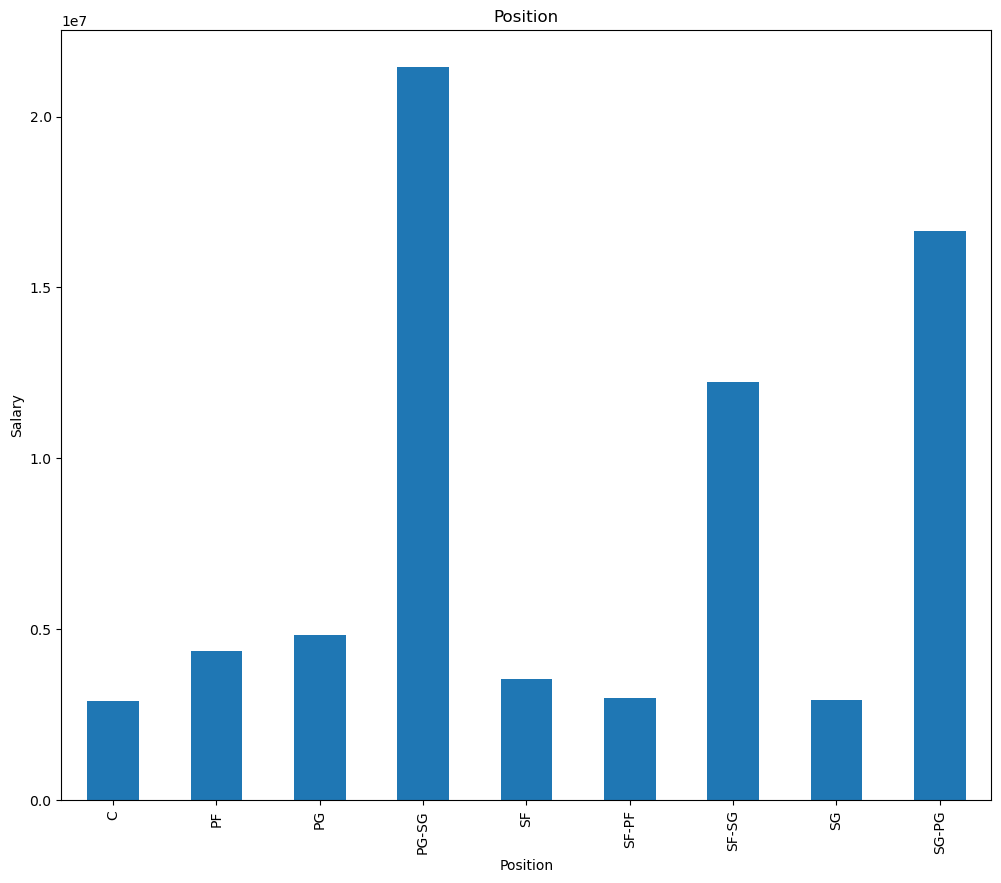

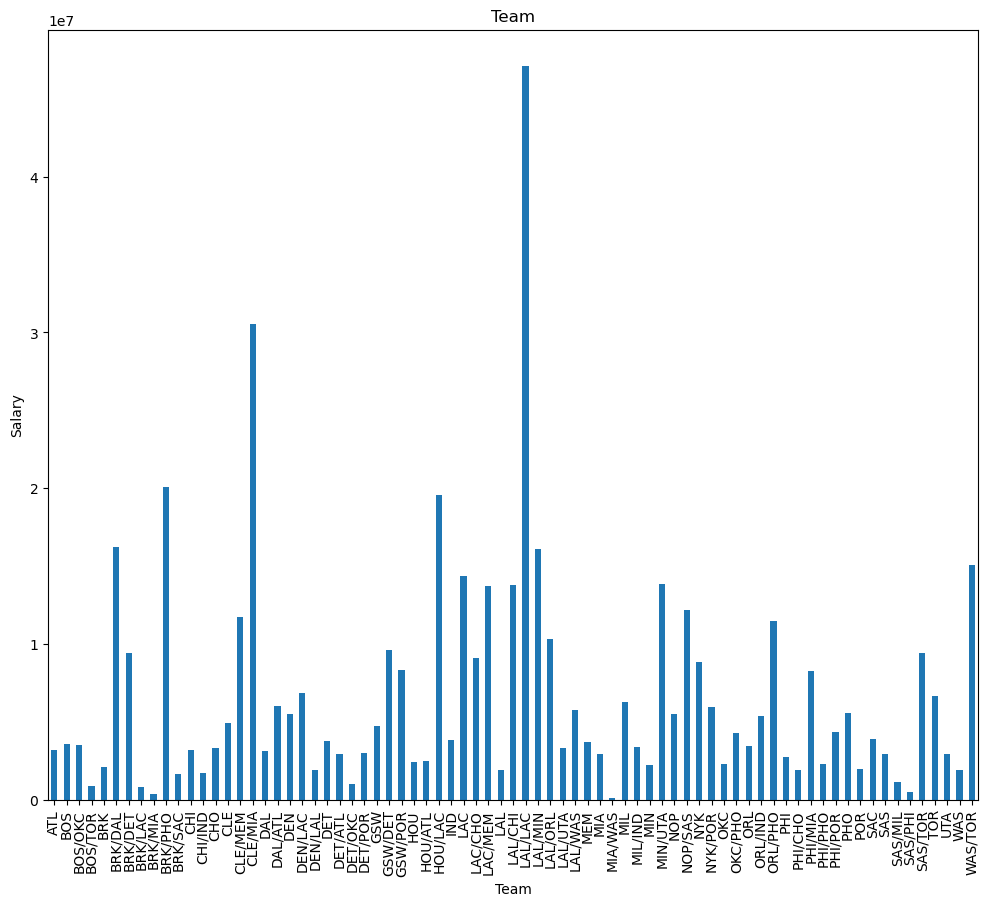

In [42]:

for feature in categorical_features:
    plt.figure(figsize=(12, 10))
    data=nba_salary.copy()
    data.groupby(feature)['Salary'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Salary')
    plt.title(feature)
    plt.show()

Correlation of numerical variables with salary

Description - Over here we do an analysis of the correlations of the various numerical features in the dataset and we present the correlation using a heatmap providing us a glimpse of the correlation between different numerical features and the 'NBA Salary' variable.

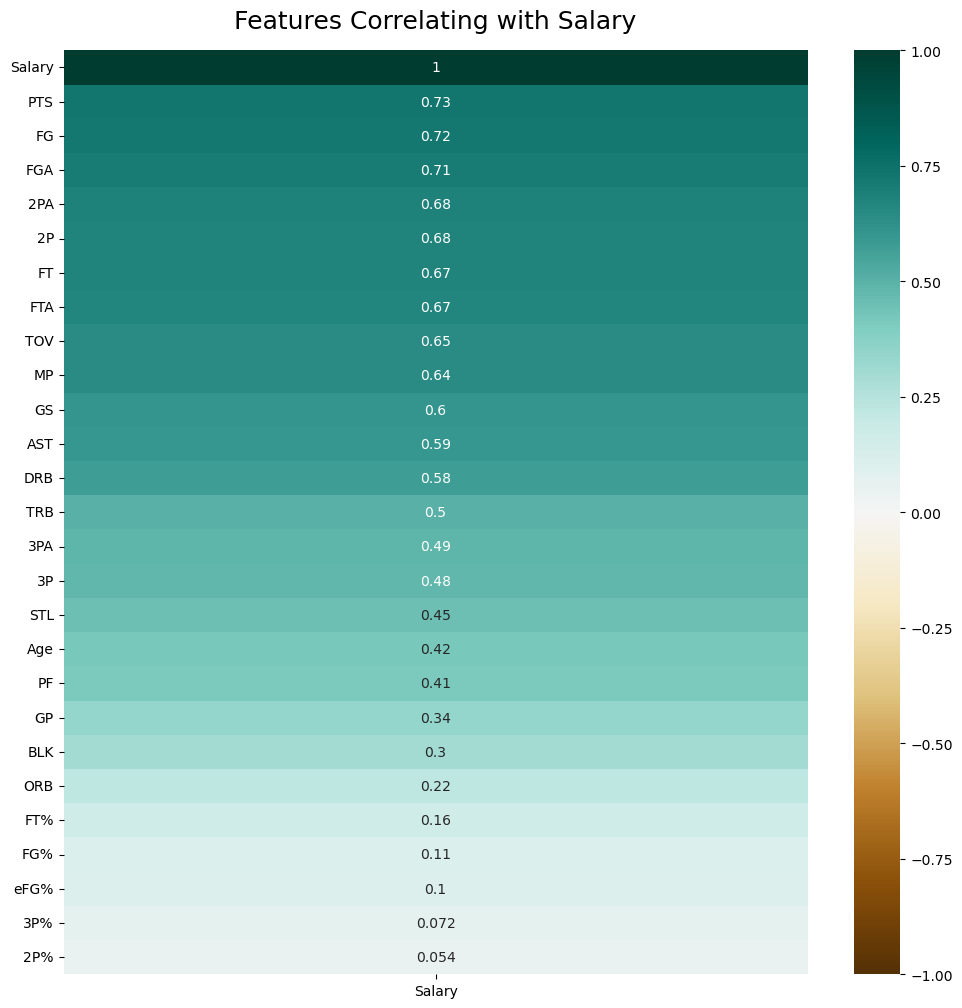

In [43]:
nba_salary_num = nba_salary[numerical_features]
sal_corr_matrix = nba_salary_num.corr()
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(nba_salary_num.corr()[['Salary']].sort_values(by='Salary', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Salary', fontdict={'fontsize':18}, pad=16);

In [44]:
# Variable of interest
variable = 'Salary'

# Extract correlations greater than 0.65 for a specific variable
high_corr_65 = sal_corr_matrix[variable][sal_corr_matrix[variable] > 0.65]

# Remove the correlation of the variable with itself
high_corr_65 = high_corr_65.drop(variable, errors='ignore')  # Safe to ignore if the variable is not in the index

# Print the results
print(f"\nVariables with correlation greater than 0.65 with respect to '{variable}':")
print(high_corr_65)


Variables with correlation greater than 0.65 with respect to 'Salary':
FG    0.72
FGA   0.71
2P    0.68
2PA   0.68
FT    0.67
FTA   0.67
PTS   0.73
Name: Salary, dtype: float64


In [45]:
trb = pd.DataFrame(nba_salary['TRB'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
trb.describe()

,TRB
count,467.00
mean,3.53
std,2.28
min,0.00
25%,1.90
50%,3.00
75%,4.50
max,12.50


Visualization of TRB(Total rebounds)

Description - Over here we present the frequency distribution of total rebounds using a bar graph categoried into different ranges, which provides us with a greater understanding of the distribution of total rebounds of NBA players.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


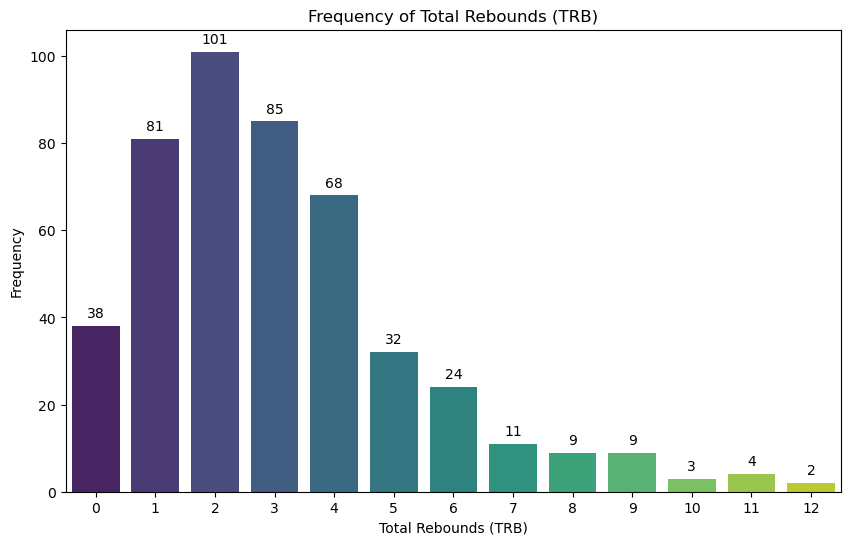

In [46]:
# Assuming 'TRB' is the column with total rebounds
# Define bins and their labels
trb_bins = range(0, 14)  # Bins from 0 to 12
trb_labels = [str(i) for i in trb_bins[:-1]]  # Labels for bins

# Categorize TRB into ranges
sal['TRB Range'] = pd.cut(nba_salary['TRB'], bins=trb_bins, labels=trb_labels, right=False)

# Plot the data
plt.figure(figsize=(10, 6))
ax = sb.countplot(data=sal, x='TRB Range', palette='viridis')

# Add frequency labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

# Improve x-axis labels readability
plt.xlabel('Total Rebounds (TRB)')
plt.ylabel('Frequency')
plt.title('Frequency of Total Rebounds (TRB)')
plt.xticks(rotation=0)
plt.show()


In [47]:
gs = pd.DataFrame(nba_salary['GS'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
gs.describe()

,GS
count,467.00
mean,22.65
std,27.09
min,0.00
25%,1.00
50%,8.00
75%,45.50
max,83.00


Visualization of GS(games played)

Description - Over here we present the frequency distribution of games started using a bar graph. This provides us with a greater understanding of the distribution of games started for NBA Players.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


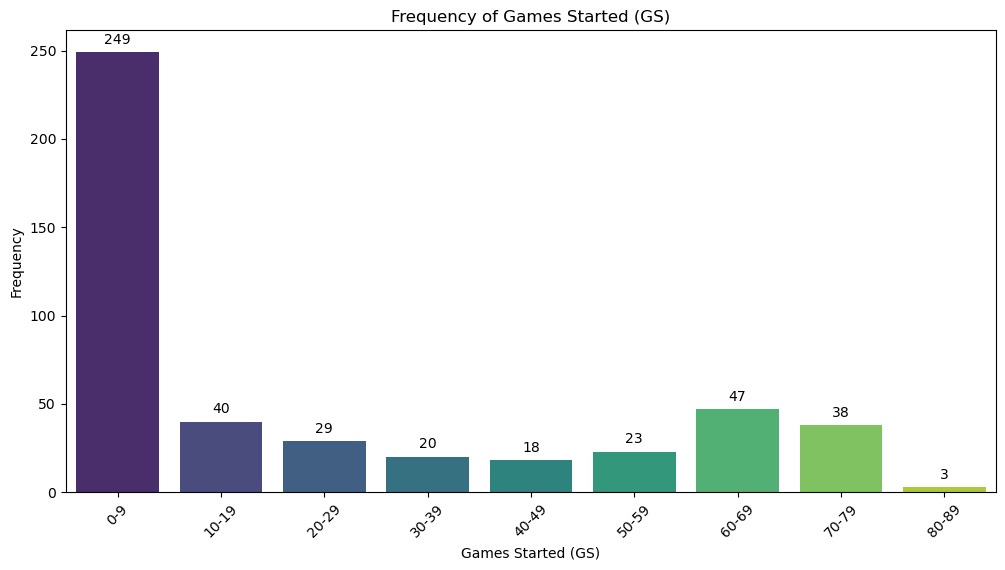

In [48]:
# Define bins and their labels
gs_bins = [i for i in range(0, 91, 10)]  # Bins from 0 to 83 in increments of 10
gs_labels = [f"{gs}-{gs+9}" for gs in gs_bins[:-1]]  # Labels for bins

# Categorize GS into ranges
sal['GS Range'] = pd.cut(nba_salary['GS'], bins=gs_bins, labels=gs_labels, right=False)

# Plot the data
plt.figure(figsize=(12, 6))
ax = sb.countplot(data=sal, x='GS Range', palette='viridis')

# Add frequency labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

# Improve x-axis labels readability
plt.xlabel('Games Started (GS)')
plt.ylabel('Frequency')
plt.title('Frequency of Games Started (GS)')
plt.xticks(rotation=45)
plt.show()


Visualization of selected numerical variables

Description - Over here we present box plots showing distribution of the selected variables which are 'FG', 'FGA', '2P', '2PA', 'FT', 'FTA' and 'PTS'. This helps us understanding the spread of data, detect anomalies and compare distributions of different variables.  

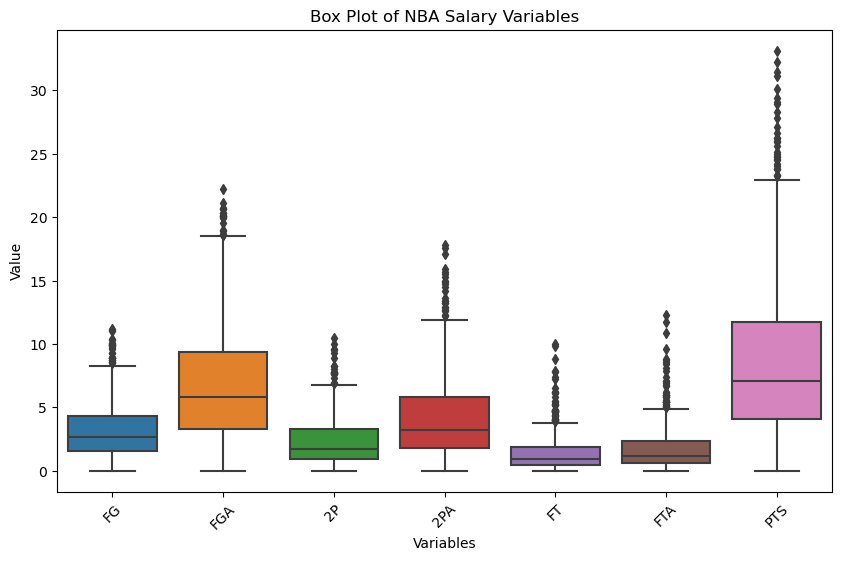

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting variables of interest
variables = ['FG', 'FGA', '2P', '2PA', 'FT', 'FTA', 'PTS']

# Creating box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=nba_salary[variables])
plt.title('Box Plot of NBA Salary Variables')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


PCA Visualization

Description - The below codes demonstrates a detailed analysis of the dataset. This includes outlier detection, croos-validation, model evaluation, model training and correlation analysis which provides us a glimpse into the features of the dataset and the potential relationships between variables.

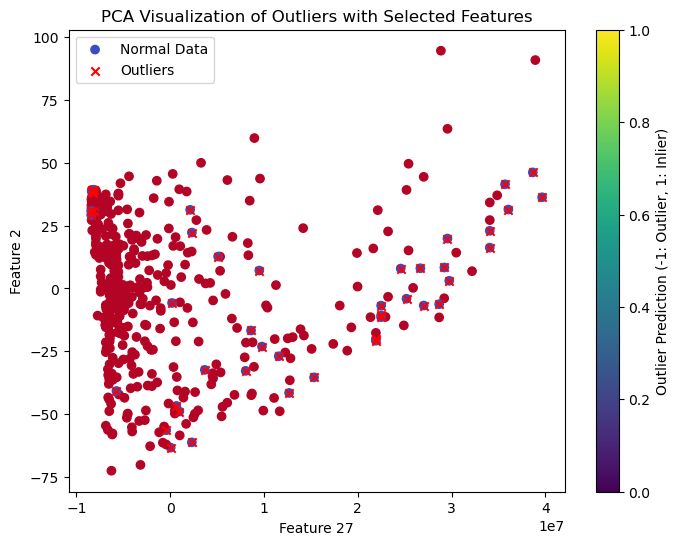

In [50]:
data_output = nba_salary['Salary']
data_features = nba_salary[numerical_features].drop(columns = ['Salary'])

# Generate example data (3D: 2 features + 1 output)
np.random.seed(10)
data = np.column_stack((data_features, data_output))  # Combined data
data[np.isnan(data)] = 0
# Fit Isolation Forest model
clf = IsolationForest(contamination=0.1)  # Adjust contamination based on expected proportion of outliers
clf.fit(data)

# Predict outliers
outliers = clf.predict(data)
outliers_indices = np.where(outliers == -1)[0]
#selected_features = data_features[:, :5]
df = pd.DataFrame(outliers)
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
data_pca = pca.fit_transform(data)

most_influential_features = np.abs(pca.components_).argmax(axis=1)
feature_names = [f"Feature {index+1}" for index in most_influential_features]

# Visualize outliers in reduced 2D space
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=outliers, cmap='coolwarm', label='Normal Data')
plt.scatter(data_pca[outliers_indices, 0], data_pca[outliers_indices, 1], color='red', marker='x', label='Outliers')
plt.title('PCA Visualization of Outliers with Selected Features')
plt.xlabel(feature_names[0])  # Use the name of the most influential feature for PC1
plt.ylabel(feature_names[1])  # Use the name of the most influential feature for PC2
plt.colorbar(label='Outlier Prediction (-1: Outlier, 1: Inlier)')
plt.legend()
plt.show()


In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
# Select features and target variable
X = nba_salary[['Team', 'Position']]
y = nba_salary['Salary']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=10)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=10)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'Training RMSE for Random Forest: {train_rmse}')
print(f'Test RMSE for Random Forest: {test_rmse}')



# Select features and target variable
X = nba_salary[['Team', 'Position']]
y = nba_salary['Salary']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=10)

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=kf, scoring='neg_mean_squared_error')

# Convert scores to positive RMSE scores
rmse_scores = np.sqrt(-cv_scores)

# Calculate R^2 scores
r2_scores = cross_val_score(model, X_encoded, y, cv=kf, scoring='r2')

# Print the results
print("Cross-validated RMSE scores:", rmse_scores)
print("Average RMSE across all folds:", np.mean(rmse_scores))
print("Standard deviation of RMSE across all folds:", np.std(rmse_scores))
print("Cross-validated R^2 scores:", r2_scores)
print("Average R^2 across all folds:", np.mean(r2_scores))
print("Standard deviation of R^2 across all folds:", np.std(r2_scores))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training RMSE for Random Forest: 8106796.734851114
Test RMSE for Random Forest: 12761865.274068957


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validated RMSE scores: [12661602.08696248 12065396.38780287 12410616.10309901 12682801.024958
 13767299.75702681]
Average RMSE across all folds: 12717543.071969833
Standard deviation of RMSE across all folds: 570232.4023319248
Cross-validated R^2 scores: [-0.44686618 -0.35624984 -0.51030219 -0.31596498 -0.4750251 ]
Average R^2 across all folds: -0.4208816554516228
Standard deviation of R^2 across all folds: 0.07319497324228103


In [52]:
# Variable of interest
variable = 'Salary'

# Extract correlations greater than 0.65 for a specific variable
high_corr_55 = sal_corr_matrix[variable][(sal_corr_matrix[variable] >=0.50) & (sal_corr_matrix[variable]<=0.65)]

# Remove the correlation of the variable with itself
high_corr_55 = high_corr_55.drop(variable, errors='ignore')  # Safe to ignore if the variable is not in the index

# Print the results
print(f"\nVariables with correlation greater than or equal to 0.50 and less than or equal to 0.65 with respect to '{variable}':")
print(high_corr_55)


Variables with correlation greater than or equal to 0.50 and less than or equal to 0.65 with respect to 'Salary':
GS    0.60
MP    0.64
DRB   0.58
TRB   0.50
AST   0.59
TOV   0.65
Name: Salary, dtype: float64


In [53]:
MP = pd.DataFrame(nba_salary['MP'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(MP.describe())
GS = pd.DataFrame(nba_salary['GS'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(GS.describe())

          MP
count 467.00
mean   19.87
std     9.55
min     1.80
25%    12.50
50%    19.20
75%    28.30
max    41.00
          GS
count 467.00
mean   22.65
std    27.09
min     0.00
25%     1.00
50%     8.00
75%    45.50
max    83.00


Creating 3 separate categorical variables from numerical variables

Description - Over here we create 3 seperate categorical variables (GS_Grade, TRB_Category, MP range) by use of binning. The binning techniques convert numerical columns into categorical variables which allows for analysis and a greater understanding of these variable based on predefined categories.

GS_Grade

In [54]:
# Check for NaN values in the 'GS' column
if nba_salary['GS'].isnull().any():
    # Handle NaN values by filling them with the median of the column
    median_gs = nba_salary['GS'].median()
    nba_salary['GS'].fillna(median_gs, inplace=True)

# Number of quantile-based bins
num_bins = 9

# Calculate bin edges based on quantiles
bin_edges = nba_salary['GS'].quantile(np.linspace(0, 1, num_bins + 1))

# Ensure unique edges (optional, helps avoid errors with non-unique bin edges)
bin_edges = np.unique(bin_edges)

# Create labels for the bins
labels = range(1, len(bin_edges))

# Create the categorical column
nba_salary['GS_Grade'] = pd.cut(nba_salary['GS'], bins=bin_edges, labels=labels, include_lowest=True)

# Print the DataFrame to verify
nba_salary.head()


,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GS_Grade
0,48070014,PG,34,GSW,56,56,34.70,10.00,20.20,0.49,...,0.70,5.40,6.10,6.30,0.90,0.40,3.20,2.10,29.40,6
1,47345760,PG,32,LAC,34,3,22.20,4.10,9.90,0.41,...,0.40,2.30,2.70,5.20,0.80,0.40,2.40,1.70,11.40,2
2,47080179,PG,34,LAL/LAC,73,24,29.10,5.90,13.60,0.44,...,1.20,4.60,5.80,7.50,1.00,0.50,3.50,2.20,15.90,4
3,44474988,PF,38,LAL,55,54,35.50,11.10,22.20,0.50,...,1.20,7.10,8.30,6.80,0.90,0.60,3.20,1.60,28.90,6
4,44119845,PF,34,BRK/PHO,47,47,35.60,10.30,18.30,0.56,...,0.40,6.30,6.70,5.00,0.70,1.40,3.30,2.10,29.10,5


TRB_Category

In [55]:

# Define the bins and labels for TRB
trb_bins = [0, 3, 6, 9, 12]
trb_labels = ['D', 'C', 'B', 'A']

# Fill NaN values in the 'TRB' column with a placeholder category, for example, 'Unknown'
nba_salary['TRB'].fillna(-1, inplace=True)

# Create the categorical variable from TRB using binning
nba_salary['TRB_Category'] = pd.cut(nba_salary['TRB'], bins=trb_bins, labels=trb_labels, right=False)

# Replace the placeholder category with NaN if needed
nba_salary['TRB_Category'] = nba_salary['TRB_Category'].cat.add_categories('Unknown').fillna('Unknown')

# Print the first few rows to verify
nba_salary.head()


,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GS_Grade,TRB_Category
0,48070014,PG,34,GSW,56,56,34.70,10.00,20.20,0.49,...,5.40,6.10,6.30,0.90,0.40,3.20,2.10,29.40,6,B
1,47345760,PG,32,LAC,34,3,22.20,4.10,9.90,0.41,...,2.30,2.70,5.20,0.80,0.40,2.40,1.70,11.40,2,D
2,47080179,PG,34,LAL/LAC,73,24,29.10,5.90,13.60,0.44,...,4.60,5.80,7.50,1.00,0.50,3.50,2.20,15.90,4,C
3,44474988,PF,38,LAL,55,54,35.50,11.10,22.20,0.50,...,7.10,8.30,6.80,0.90,0.60,3.20,1.60,28.90,6,B
4,44119845,PF,34,BRK/PHO,47,47,35.60,10.30,18.30,0.56,...,6.30,6.70,5.00,0.70,1.40,3.30,2.10,29.10,5,B


MP range

     MP       MP range
0 34.70  30-35 minutes
1 22.20  20-25 minutes
2 29.10  25-30 minutes
3 35.50  35-40 minutes
4 35.60  35-40 minutes


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


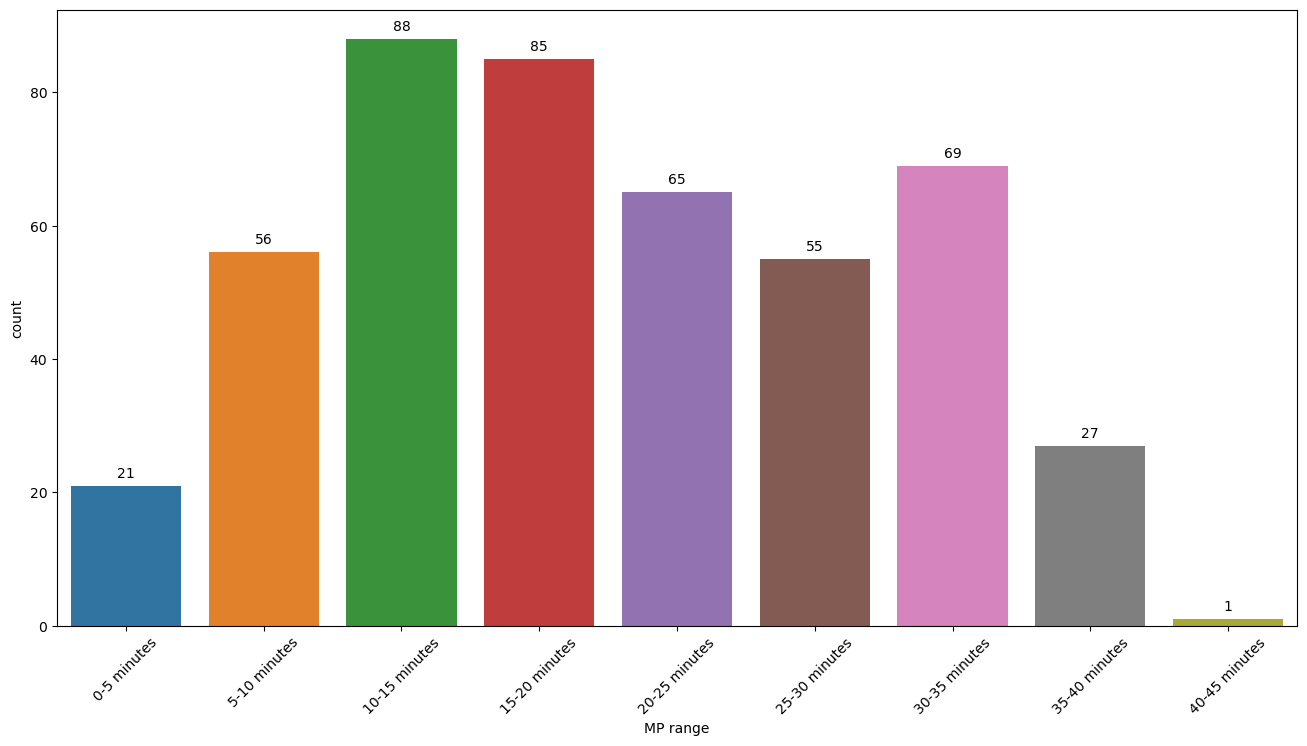

In [56]:
# Define bins and their labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]  # Continue as needed
labels = ['0-5 minutes', '5-10 minutes', '10-15 minutes', '15-20 minutes', '20-25 minutes', '25-30 minutes', '30-35 minutes', '35-40 minutes', '40-45 minutes']   # Match bin ranges

# Categorize salaries into ranges
MP['MP range'] = pd.cut(MP['MP'], bins=bins, labels=labels, right=False)

# Verify the categorization
print(MP.head())

# Plot the data
f = plt.figure(figsize=(16, 8))
ax = sb.countplot(data=MP, x='MP range')

# Add frequency labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Improve x-axis labels readability
plt.xticks(rotation=45)
plt.show()


In [57]:
# Number of quantile-based bins
num_bins = 9

# Calculate bin edges based on quantiles
bin_edges = nba_salary['MP'].quantile(np.linspace(0, 1, num_bins + 1))

# Ensure unique edges (optional, helps avoid errors with non-unique bin edges)
bin_edges = np.unique(bin_edges)

# Create labels for the bins
labels = range(1, len(bin_edges))

# Create the categorical column
nba_salary['MP_Grade'] = pd.cut(nba_salary['MP'], bins=bin_edges, labels=labels, include_lowest=True)

# Print the DataFrame to verify
nba_salary

,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,GS_Grade,TRB_Category,MP_Grade
0,48070014,PG,34,GSW,56,56,34.70,10.00,20.20,0.49,...,6.10,6.30,0.90,0.40,3.20,2.10,29.40,6,B,9
1,47345760,PG,32,LAC,34,3,22.20,4.10,9.90,0.41,...,2.70,5.20,0.80,0.40,2.40,1.70,11.40,2,D,6
2,47080179,PG,34,LAL/LAC,73,24,29.10,5.90,13.60,0.44,...,5.80,7.50,1.00,0.50,3.50,2.20,15.90,4,C,7
3,44474988,PF,38,LAL,55,54,35.50,11.10,22.20,0.50,...,8.30,6.80,0.90,0.60,3.20,1.60,28.90,6,B,9
4,44119845,PF,34,BRK/PHO,47,47,35.60,10.30,18.30,0.56,...,6.70,5.00,0.70,1.40,3.30,2.10,29.10,5,B,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,35096,SF,23,POR,4,0,22.30,1.80,5.80,0.30,...,3.80,1.00,0.50,1.30,1.00,2.30,4.30,1,C,6
463,32795,SG,25,CHO,5,0,5.60,0.20,1.20,0.17,...,0.80,1.00,0.00,0.40,0.20,0.00,1.00,1,D,1
464,32171,SG,29,IND,3,0,18.70,2.70,7.00,0.38,...,2.00,1.70,0.70,0.00,0.00,1.70,8.00,1,D,5
465,5849,PF,23,BRK,1,0,35.00,6.00,12.00,0.50,...,9.00,7.00,0.00,1.00,4.00,5.00,16.00,1,A,9


Machine Learning Models

Linear Regression

In [58]:
#y = nba_salary['Salary']
#x = nba_salary[nba_salary[numerical_features]].drop(columns = ['Salary'])
#len(y)
imputer = SimpleImputer(strategy='mean')  # Use mean imputation, you can choose another strategy
imp_x = imputer.fit_transform(data_features)
imp_y = imputer.fit_transform(data_output.values.reshape(-1,1))

# Reshape target variable (y)
#y = imp_y.reshape(-1, 1)  # 
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(imp_x, imp_y, test_size=0.2, random_state=2)
X_train_normal.shape, X_test_normal.shape
# Train linear regression model on normal data
normal_model = LinearRegression()
normal_model.fit(X_train_normal, y_train_normal)
y_pred_normal = normal_model.predict(X_test_normal)
normal_mse = mean_squared_error(y_test_normal, y_pred_normal)
Scorer2 = r2_score(y_test_normal, y_pred_normal)
print("Normal Data Model MSE:", normal_mse)
print("Normal Data Model R^2:", Scorer2)

Normal Data Model MSE: 46189260472132.305
Normal Data Model R^2: 0.5950209008275255


In [59]:
normal_data_features = data_features[df[0] == 1]  # Subset of normal data
outliers_data_features = data_features[df[0] == -1]  # Subset of outliers
normal_data_output = data_output[df[0] == 1]
outliers_data_output = data_output[df[0] == -1]
imputer = SimpleImputer(strategy='mean')  # Use mean imputation, you can choose another strategy
normal_data_imputed = imputer.fit_transform(normal_data_features)
outliers_data_imputed = imputer.transform(outliers_data_features)

Normal Data Model MSE: 30248255138503.76
Normal Data Model R^2: 0.5716944508452841
Outliers Data Model MSE: 187150776941221.44
Outliers Data Model R^2: 0.2833458382686457


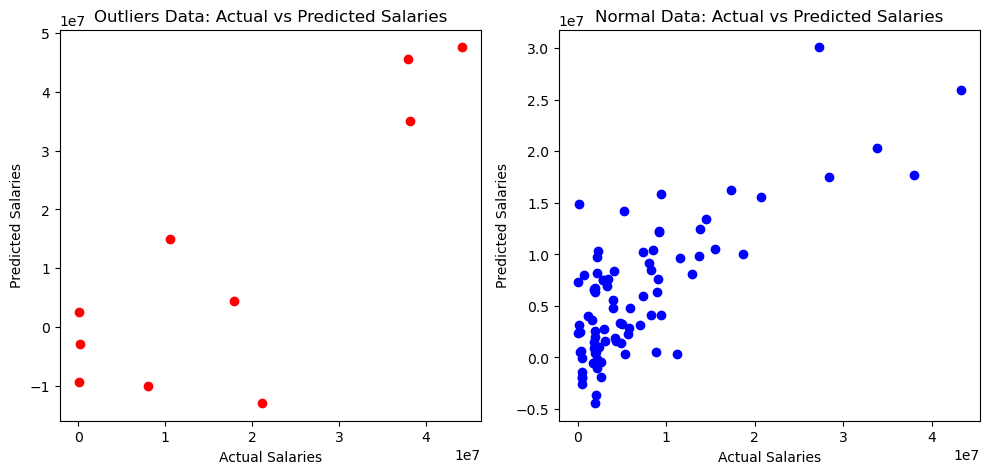

In [60]:
# Split data into train and test sets
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(normal_data_imputed, normal_data_output, test_size=0.2, random_state=10)
X_train_normal.shape, X_test_normal.shape
# Train linear regression model on normal data
normal_model = LinearRegression()
normal_model.fit(X_train_normal, y_train_normal)
y_pred_normal = normal_model.predict(X_test_normal)
normal_mse = mean_squared_error(y_test_normal, y_pred_normal)
Scorer2 = r2_score(y_test_normal, y_pred_normal)
print("Normal Data Model MSE:", normal_mse)
print("Normal Data Model R^2:", Scorer2)
# Optionally, train linear regression model on outlier data (if sufficient outlier data is available)
if len(outliers) > 0:
    X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(outliers_data_imputed, outliers_data_output, test_size=0.2, random_state=10)
    outliers_model = LinearRegression()
    outliers_model.fit(X_train_outliers, y_train_outliers)
    y_pred_outliers = outliers_model.predict(X_test_outliers)
    outliers_mse = mean_squared_error(y_test_outliers, y_pred_outliers)
    Scorer3 = r2_score(y_test_outliers, y_pred_outliers)
    print("Outliers Data Model MSE:", outliers_mse)
    print("Outliers Data Model R^2:", Scorer3)
    # Plot regression graphs for outliers
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test_outliers, y_pred_outliers, color='red')
    #plt.plot([y_test_outliers.min(), y_test_outliers.max()], [y_test_outliers.min(), y_test_outliers.max()], 'k--', lw=2)
    plt.xlabel('Actual Salaries')
    plt.ylabel('Predicted Salaries')
    plt.title('Outliers Data: Actual vs Predicted Salaries')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test_normal, y_pred_normal, color='blue')
    #plt.plot([y_test_normal.min(), y_test_normal.max()], [y_test_normal.min(), y_test_normal.max()], 'k--', lw=2)
    plt.xlabel('Actual Salaries')
    plt.ylabel('Predicted Salaries')
    plt.title('Normal Data: Actual vs Predicted Salaries')

    plt.tight_layout()
    plt.show()
#xvar_train, xvar_test, yvar_train, yvar_test = train_test_split(data_features, data_output[outliers], test_size=0.2, random_state = 10)


Random Forest

In [61]:
# Selecting features and target variable
X = normal_data_imputed  # Features
y = normal_data_output  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=1000, random_state=10)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f'Training RMSE for Random forest: {train_rmse}')
print(f'Test RMSE for Random forest: {test_rmse}')

Training RMSE for Random forest: 1994339.7538057761
Test RMSE for Random forest: 6497971.851155301


In [62]:


# Selecting features and target variable
X_cat = nba_salary[['MP_Grade', 'TRB_Category', 'GS_Grade']]  # Categorical features
X_num = nba_salary[['FG', 'FGA', '2P', '2PA', 'FT', 'FTA', 'PTS']]   # Numerical features
y = nba_salary['Salary']  # Target variable

# Encode categorical features
ordinal_encoder = OrdinalEncoder()
X_cat_encoded = ordinal_encoder.fit_transform(X_cat)

# Concatenate categorical and numerical features
X = np.concatenate((X_cat_encoded, X_num), axis=1)
X = imputer.fit_transform(X)
# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=1000, random_state=10)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Print results
print("Cross-validated RMSE scores:", rmse_scores)
print("Average RMSE across all folds:", np.mean(rmse_scores))
print("Standard deviation of RMSE across all folds:", np.std(rmse_scores))

print("Cross-validated R^2 scores:", r2_scores)
print("Average R^2 across all folds:", np.mean(r2_scores))
print("Standard deviation of R^2 across all folds:", np.std(r2_scores))



Cross-validated RMSE scores: [8461942.46571526 7940516.00235903 7019533.07784964 8659546.49015727
 6924932.53696288]
Average RMSE across all folds: 7801294.114608817
Standard deviation of RMSE across all folds: 717160.5191798855
Cross-validated R^2 scores: [0.35376395 0.41257292 0.51683706 0.38651455 0.62680745]
Average R^2 across all folds: 0.4592991859504526
Standard deviation of R^2 across all folds: 0.09998825691981124


In [63]:

X = normal_data_imputed  # Features
y = normal_data_output  # Target variable

# Define the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=10)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=1000, random_state=10)

# Perform cross-validation
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

# Calculate RMSE from MSE
rmse_scores = np.sqrt(-mse_scores)
# Perform cross-validation and calculate R^2 scores
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

# Print the cross-validated R^2 scores
print("Cross-validated R^2 scores:", r2_scores)

# Calculate the mean R^2 value
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)

print("Cross-validated RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))


Cross-validated R^2 scores: [0.64702567 0.65870082 0.50446021 0.72425064 0.58501352]
Mean R^2: 0.6238901697439645
Cross-validated RMSE scores: [4992808.12459077 5615259.24804804 5794312.44236504 4813943.34005313
 6249531.89253107]
Mean RMSE: 5493171.00951761
Standard Deviation of RMSE: 527140.7268455398


Multivariate Polynomial regression

In [64]:


# Select predictors and target variable
X = nba_salary[['FG', 'FGA', '2P', '2PA', 'FT', 'FTA', 'PTS']]
y = nba_salary['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create polynomial features
degree = 2  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test data
y_pred = model.predict(X_test_poly)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Polynomial Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Polynomial Regression Evaluation Metrics:
Mean Squared Error (MSE): 82714550127235.72
Root Mean Squared Error (RMSE): 9094753.989374079
R^2 Score: 0.2534945970459562


In [ ]:
#_ = model.fit(imputer.fit_transform(data_train), target_train)
#categorical_columns = ['Color', 'Size', 'Shape']
new_df= nba_salary.copy()
# Perform one-hot encoding and concatenate with original DataFrame
new_df = pd.concat([new_df, pd.get_dummies(new_df[categorical_features])], axis=1)

# Drop the original categorical columns if needed
new_df = new_df.drop(categorical_features, axis=1)

# Display the DataFrame with numerical columns
print(new_df)


Training a simple neural network with both the one hot encoded categorical variables and the numerical variables.

Neural network

In [68]:

# Assuming X and y are your input features and target variable, respectively
print(new_df.dtypes)

# Convert non-numeric columns to numeric data types, if possible
new_df_numeric = new_df.apply(pd.to_numeric, errors='ignore')

# Handle categorical columns appropriately, such as encoding them using one-hot encoding
new_df_encoded = pd.get_dummies(new_df_numeric)

# Ensure there are no missing values
new_df_encoded.dropna(inplace=True)

X = new_df_encoded.drop('Salary', axis=1)  # Features
y = new_df_encoded['Salary']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

class NBA_SalaryPredictor(nn.Module):
    def __init__(self, input_size):
        super(NBA_SalaryPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
input_size = X_train_tensor.shape[1]
model = NBA_SalaryPredictor(input_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    mse = criterion(y_pred, y_test_tensor)
    r2 = r2_score(y_test_tensor.numpy(), y_pred.numpy())
    print(f'Mean Squared Error: {mse.item():.4f}')
    print(f'R^2 Score: {r2:.4f}')

Salary            int64
Age               int64
GP                int64
GS                int64
MP              float64
                 ...   
Team_SAS/TOR       bool
Team_TOR           bool
Team_UTA           bool
Team_WAS           bool
Team_WAS/TOR       bool
Length: 114, dtype: object
Epoch [10/100], Loss: 201575599439872.0000
Epoch [20/100], Loss: 201575582662656.0000
Epoch [30/100], Loss: 201575565885440.0000
Epoch [40/100], Loss: 201575481999360.0000
Epoch [50/100], Loss: 201575381336064.0000
Epoch [60/100], Loss: 201575196786688.0000
Epoch [70/100], Loss: 201574928351232.0000
Epoch [80/100], Loss: 201574542475264.0000
Epoch [90/100], Loss: 201574055936000.0000
Epoch [100/100], Loss: 201573401624576.0000
Mean Squared Error: 187567295168512.0000
R^2 Score: -0.6012


The neural network is being underfitted.

XGBoost Regression

In [69]:

# Select predictors and target variable
y = nba_salary["Salary"]  # Salary y value
X = nba_salary_num.drop(["Salary"], axis=1)

# Define the XGBoost regressor
xgb = XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", np.sqrt(-grid_search.best_score_))

# Perform cross-validation with the best estimator
best_xgb = grid_search.best_estimator_
cv_scores = cross_val_score(best_xgb, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert scores to positive RMSE scores
rmse_scores = np.sqrt(-cv_scores)

# Calculate R^2 scores
r2_scores = cross_val_score(best_xgb, X, y, scoring='r2',cv=kf)

# Print the results
print("Cross-validated RMSE scores:", rmse_scores)
print("Average RMSE across all folds:", np.mean(rmse_scores))
print("Standard deviation of RMSE across all folds:", np.std(rmse_scores))
print("Cross-validated R^2 scores:", r2_scores)
print("Average R^2 across all folds:", np.mean(r2_scores))
print("Standard deviation of R^2 across all folds:", np.std(r2_scores))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best Score: 5449395.660827251
Cross-validated RMSE scores: [6262602.98047082 6056674.46609778 4922978.11111782 5442073.7651102
 4327144.93800308]
Average RMSE across all folds: 5402294.85215994
Standard deviation of RMSE across all folds: 714928.9465178272
Cross-validated R^2 scores: [0.64603461 0.65823706 0.76235265 0.75770591 0.85428483]
Average R^2 across all folds: 0.7357230107799052
Standard deviation of R^2 across all folds: 0.076547206945455
